# [**Erreurs OOB pour les forêts aléatoires**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/1_11_ensembles/plot_gradient_boosting_regularization.ipynb)<br/>([*OOB Errors for Random Forests*](https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regularization.html))

Le [**`RandomForestClassifier`**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) est entraîné à l'aide de l'*agrégation bootstrap*, où chaque nouvel arbre est ajusté à partir d'un échantillon bootstrap des observations d'entraînement $z_i = (x_i, y_i)$. L'erreur *hors sac* (**OOB** - out-of-bag) est l'erreur moyenne pour chaque $z_i$ calculée à l'aide des prédictions des arbres qui ne contiennent pas $z_i$ dans leur échantillon bootstrap respectif. Cela permet au [**`RandomForestClassifier`**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) d'être ajusté et validé tout en étant entraîné [1].

L'exemple ci-dessous montre comment l'erreur OOB peut être mesurée à l'ajout de chaque nouvel arbre pendant l'entraînement. Le tracé résultant permet à un praticien d'estimer une valeur appropriée de `n_estimators` à laquelle l'erreur se stabilise.

[1] T. Hastie, R. Tibshirani et J. Friedman, [“**Elements of Statistical Learning Ed. 2**](https://hastie.su.domains/Papers/ESLII.pdf)[”](https://drive.google.com/file/d/1wbK7Ii8bQliX7D3rKyGoR0-gxqJZ11iN/view?usp=share_link), p592-593, Springer, 2009.

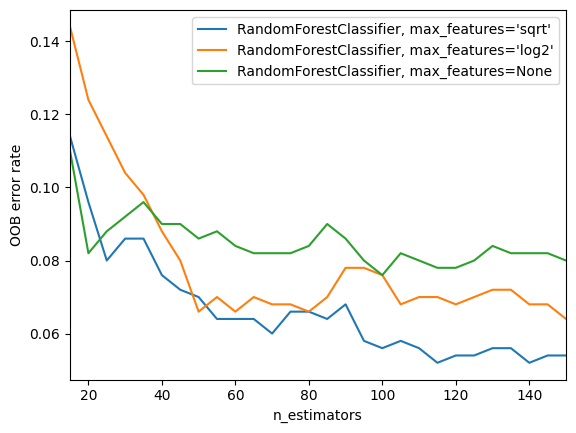

: 

In [1]:
# Author: Kian Ho <hui.kian.ho@gmail.com>
#         Gilles Louppe <g.louppe@gmail.com>
#         Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 Clause

import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 123

# Generate a binary classification dataset.
X, y = make_classification(
    n_samples=500,
    n_features=25,
    n_clusters_per_class=1,
    n_informative=15,
    random_state=RANDOM_STATE,
)

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()